# Блок 1.

С помощью symPy найдите полиномы, описывающие данные наборы точек. Затем проведите полное исследование каждого полученного полинома: проверьте четность/нечетность, найдите нули, промежутки знакопостоянства. Постройте их графики. С помощью изменения промежутка для х добейтесь того, чтобы все нули были отображены на графике функции. <br><br><br>
а) $(-4; -4268), (-3; -1227), (-1; -17), (1; 17), (3; 1227), (4; 4268)$<br><br>
б)$ (-4; -16729), (-3; -3999), (-1; 5), (1; 1), (3; 4005), (4; 16735)$


In [1]:
from functools import reduce
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import display

sp.init_printing()

In [2]:
from sympy.abc import x

def analyze(f: sp.core.expr.Expr, dots: List[Tuple[float, float]]) -> None:
    display(f)

    xs, ys = zip(*dots)
    xx = np.linspace(-5, 5, 500)
    yy = sp.lambdify(x, f)(xx)
    plt.plot(xx, yy)
    plt.scatter(xs, ys)
    
    display(        
        ["zeors:", sp.solve(f)], 
        [f < 0, "on", sp.solve(f < 0)], 
        [f > 0, "on", sp.solve(f > 0)],
        ["f is even:", f == f.subs(x, -x)],
        ["f is odd:", f == -f.subs(x, -x)]
    )

def find_poly(dots: List[Tuple[float, float]]) -> sp.core.expr.Expr:
    xs, ys = zip(*dots)
    ys = sp.Matrix(ys)
    
    powers = [[x ** i for i in range(len(dots) - 1, -1, -1)] for x in xs]
    a = sp.Matrix(powers).LUsolve(ys)

    return reduce(
        lambda acc, e: acc + e[1] * x ** (len(dots) - e[0]),
        enumerate(a, 1),
        sp.simplify(0)
    )

def find_poly_and_analyze(dots: List[Tuple[float, float]]) -> None:
    analyze(find_poly(dots), dots)

['zeors:',
 [0,
  -I*sqrt(19/6 + sqrt(421)/6),
  I*sqrt(19/6 + sqrt(421)/6),
  -sqrt(-19/6 + sqrt(421)/6),
  sqrt(-19/6 + sqrt(421)/6)]]

[3*x**5 + 19*x**3 - 5*x < 0,
 'on',
 ((-oo < x) & (x < CRootOf(3*x**4 + 19*x**2 - 5, 0))) | ((0 < x) & (x < CRootOf(3*x**4 + 19*x**2 - 5, 1)))]

[3*x**5 + 19*x**3 - 5*x > 0,
 'on',
 ((x < 0) & (CRootOf(3*x**4 + 19*x**2 - 5, 0) < x)) | ((x < oo) & (CRootOf(3*x**4 + 19*x**2 - 5, 1) < x))]

['f is even:', False]

['f is odd:', True]

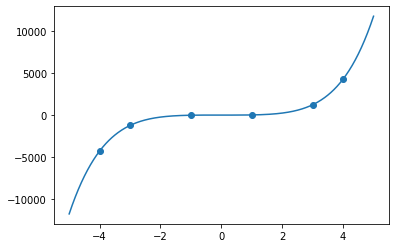

In [3]:
find_poly_and_analyze([(-4, -4268), (-3, -1227), (-1, -17), (1, 17), (3, 1227), (4, 4268)])

['zeors:',
 [CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 0),
  CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 1),
  CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 2),
  CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 3),
  CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 4)]]

[16*x**5 + 7*x**3 - 25*x + 3 < 0,
 'on',
 ((-oo < x) & (x < CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 0))) | ((x < CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 2)) & (CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 1) < x))]

[16*x**5 + 7*x**3 - 25*x + 3 > 0,
 'on',
 ((x < oo) & (CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 2) < x)) | ((x < CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 1)) & (CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 0) < x))]

['f is even:', False]

['f is odd:', False]

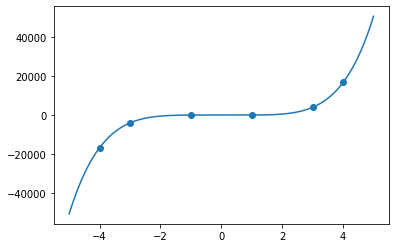

In [4]:
find_poly_and_analyze([(-4, -16729), (-3, -3999), (-1, 5), (1, 1), (3, 4005), (4, 16735)])

# Блок 2.

In [5]:
from sympy import *
from sympy.plotting import plot
init_printing(use_unicode=False, wrap_line=False, no_global=True)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
x = Symbol('x')

## 1.
### Получите значение MSE меньшее 5.

In [8]:
def print_points_ands_function1(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([2, -4, 1, 8, 21, 40, 47, 65, 75, 92])
    plt.xlim(-6, 10)
    plt.ylim(-1, 100)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [9]:
f1 = 48 * x**2 - 128 * x + 83
f1

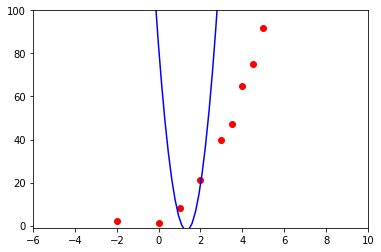

MSE = 93691.3


In [10]:
print_points_ands_function1(f1)

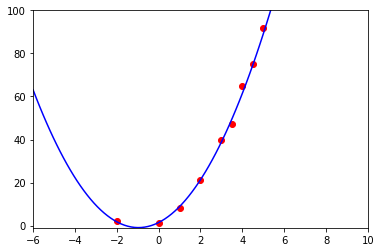

MSE = 4.011640997229902


In [11]:
f1_ = (f1 - 15).subs(x, x + 2.3) / 19
print_points_ands_function1(f1_)

In [12]:
expand(f1_)

## 2.
### Получите значение MSE меньшее 35.

In [13]:
def print_points_ands_function2(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([-31, -9, 4, -1, 9, 24, 47, 92, 120, 170])
    plt.xlim(-3, 6)
    plt.ylim(-35, 200)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [14]:
f2 = 4 * x**3 + 30 * x**2 + 74 * x + 62
f2

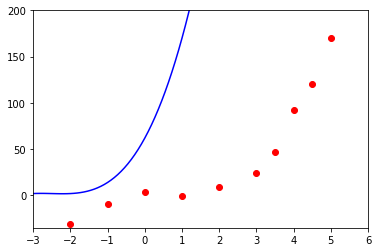

MSE = 607200.2


In [15]:
print_points_ands_function2(f2)

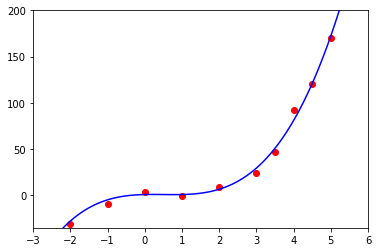

MSE = 22.26961451247162


In [16]:
f2_ = (f2).subs(x, x - 3) / 2.1
print_points_ands_function2(f2_)

In [17]:
expand(f2_)

## 3.
### Получите значение MSE меньшее 3300.

In [18]:
def print_points_ands_function3(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([60, 25, 4, -0, -57, -195, -295, -540, -700, -760])
    plt.xlim(-10, 6)
    plt.ylim(-850, 100)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [19]:
f3 = -36 * x**3 - 756 * x**2 - 5334 * x - 12636
f3

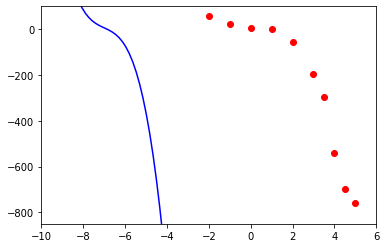

MSE = 1346344545.35


In [20]:
print_points_ands_function3(f3)

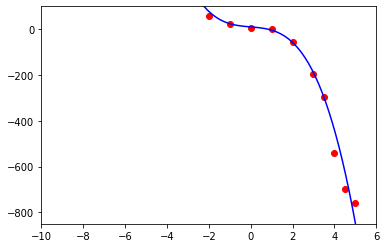

MSE = 2427.970247933907


In [21]:
f3_ = (f3 + 50).subs(x, x - 7) / 5.5
print_points_ands_function3(f3_)

In [22]:
expand(f3_)

## 4.
### Получите значение MSE меньшее 25.

In [23]:
def print_points_ands_function4(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([-42, -37, -23, -36, -45, -80, -83, -110, -131, -155])
    plt.xlim(-4, 20)
    plt.ylim(-160, -10)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [24]:
f4 = - 5 / 4 * x**2 + 25 * x - 152
f4

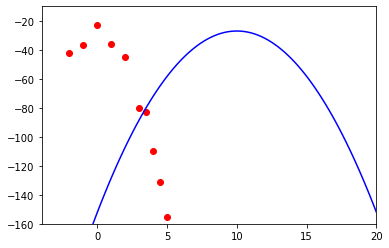

MSE = 9143.51953125


In [25]:
print_points_ands_function4(f4)

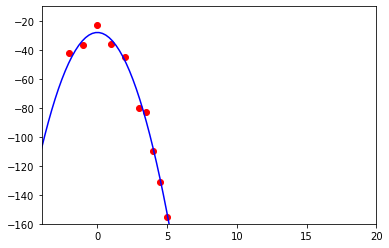

MSE = 19.4125


In [26]:
f4_ = (f4 + 20).subs(x, x + 10) * 4
print_points_ands_function4(f4_)

In [27]:
expand(f4_)